In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import sample

In [2]:
# Functions
def show_image(img, shape=(15, 15), img_type="bgr"):
    plt.rcParams["figure.figsize"] = shape
    if img_type == "bgr":
        plt.imshow(img[:, :, [2, 1, 0]])
    elif img_type.lower() == "gray":
        plt.imshow(img, cmap='gray')


def show_keypoints(img, keypoints):
    img = cv2.drawKeypoints(image=img, keypoints=keypoints, outImage=np.array(
        []), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    show_image(img)


def to_grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


def print_matches(matches):
    try:
        if type(matches[0]) not in (np.ndarray, list):
            for match in matches:
                print('Train=%4d Query=%4d Distance=%4.2f' %
                      (match.trainIdx, match.queryIdx, match.distance))
        else:
            for match_ in matches:
                for match in match_:
                    print('Train=%4d Query=%4d Distance=%4.2f' %
                          (match.trainIdx, match.queryIdx, match.distance))
    except:
        pass


def draw_matches(img1, img2, kp1, kp2, matches):
    img3 = cv2.drawMatches(img1, kp1, img2, kp2,
                           matches, outImg=np.array([]))  # , matchColor=(0, 255, 0))
    show_image(img3)

# https://docs.opencv.org/3.1.0/da/df5/tutorial_py_sift_intro.html


def get_sift_features(img):
    if len(img.shape) == 3:
        img = to_grayscale(img)
    sift_obj = cv2.xfeatures2d.SIFT_create()
    return sift_obj.detectAndCompute(img, None)


def get_sift_features_and_show(img, show=False):
    keypoints = get_sift_features(img)
    if(show):
        show_keypoints(img, keypoints[0])
    return keypoints


def cv_matcher(img1, desc1, img2, desc2, kp1=None, kp2=None, threshold=0.75):
    brute_force_matcher = cv2.BFMatcher()

    # Match descriptors.
    matches = brute_force_matcher.knnMatch(desc1, desc2, k=2)

    # Apply ratio test
    good = []
    for m, n in matches:
        if m.distance < threshold * n.distance:
            good.append(m)

    if kp1 != None and kp2 != None:
        img3 = cv2.drawMatches(img1, kp1, img2, kp2,
                               good, outImg=np.array([]))  # , matchColor=(0, 255, 0))
        show_image(img3)


def knn_matcher(arr2, arr1, neighbours=2, img_id=0):
    assert neighbours == 2

    all_distances = np.sqrt(np.square(arr2).sum(
        axis=1)[:, np.newaxis] + np.square(arr1).sum(axis=1) - 2 * arr2.dot(arr1.T))

    closest_indices = np.argsort(all_distances, axis=1)[:, :neighbours]

    matches = []
    for i in range(closest_indices.shape[0]):
        match_list = [cv2.DMatch(
            _trainIdx=n, _queryIdx=i, _distance=all_distances[i, n], _imgIdx=img_id) for n in closest_indices[i]]
        matches.append(match_list)

    return matches


def filter_matches(matches, threshold=0.75):
    filtered = []
    for m, n in matches:
        if m.distance < threshold * n.distance:
            filtered.append(m)
    return filtered

In [3]:
img1 = cv2.imread("../data/nevada4.jpg")
img2 = cv2.imread("../data/nevada5.jpg")

In [4]:
keypoints1, descriptors1 = get_sift_features_and_show(img1)
keypoints2, descriptors2 = get_sift_features_and_show(img2)

In [5]:
#cv_matches = cv_matcher(img1, descriptors1, img2, descriptors2, keypoints1, keypoints2)

In [6]:
matches = filter_matches(knn_matcher(descriptors1, descriptors2))

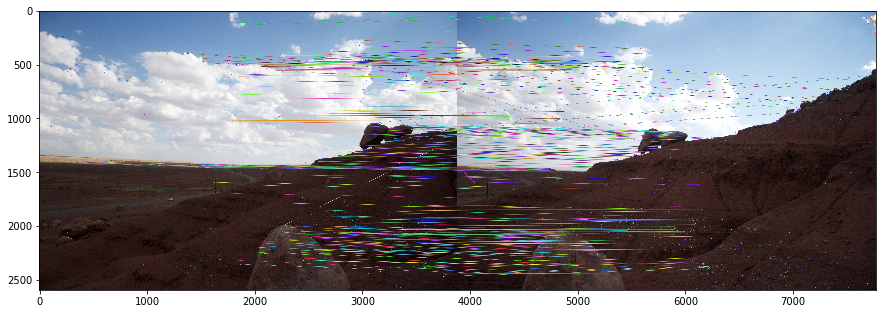

In [7]:
draw_matches(img1, img2, keypoints1, keypoints2, matches)

In [8]:
print_matches(matches)

Train= 178 Query=  43 Distance=42.31
Train= 178 Query=  53 Distance=68.07
Train= 178 Query=  68 Distance=64.59
Train=  11 Query= 188 Distance=145.51
Train=  11 Query= 190 Distance=184.68
Train=  71 Query= 194 Distance=124.56
Train=  71 Query= 199 Distance=115.95
Train=  71 Query= 200 Distance=126.33
Train=  71 Query= 206 Distance=110.56
Train=1777 Query= 254 Distance=174.77
Train=1908 Query= 277 Distance=73.36
Train=   7 Query= 286 Distance=77.60
Train= 303 Query= 288 Distance=57.96
Train=   7 Query= 289 Distance=82.96
Train=   6 Query= 292 Distance=84.61
Train=  13 Query= 296 Distance=75.35
Train=   7 Query= 297 Distance=79.20
Train=   7 Query= 300 Distance=72.46
Train=  12 Query= 301 Distance=70.53
Train=  17 Query= 306 Distance=134.47
Train=  18 Query= 307 Distance=58.04
Train=  15 Query= 308 Distance=94.12
Train=  16 Query= 309 Distance=56.87
Train=  27 Query= 317 Distance=81.57
Train=  20 Query= 320 Distance=60.54
Train=  22 Query= 321 Distance=95.62
Train=  23 Query= 324 Distance

limit_output extension: Maximum message size of 10000 exceeded with 17463 characters

In [9]:
def ransac(matches, kp1, kp2, sample_points=4, iterations=5, inlier_tolerance=1e-3, inlier_ratio=0.4):
    best_homography = None
    for i in range(iterations):
        samples = sample(matches, sample_points)

        # Gets the points corresponding to the selected samples
        pts1 = [kp1[s.trainIdx].pt for s in samples]
        pts2 = [kp2[s.queryIdx].pt for s in samples]
        
        print_matches(samples)
#         print(pts1)
#         print(pts2)

#         draw_matches(img1, img2, pts1, pts2, sample)
        # Calculate the homography matrix for the selected points
#         h = get_homography_matrix(pts1, pts2)
        # Computer no.of inliers and update the model (if neccessary)

In [10]:
ransac(matches, keypoints1, keypoints2)

Train=1020 Query=1247 Distance=112.21
Train= 179 Query= 550 Distance=154.85
Train= 839 Query=1120 Distance=166.20
Train=  46 Query= 376 Distance=166.43
Train= 196 Query= 568 Distance=183.01
Train= 417 Query= 761 Distance=31.98
Train=1146 Query=1362 Distance=119.22
Train= 241 Query= 591 Distance=40.41


IndexError: list index out of range

In [39]:
'''
    Computes the homography matrix for the given points using 
    the Direct Linear transform
'''
def get_homography_matrix(pts1, pts2):
    eqn_list = []
    for (x1, y1), (x2, y2) in zip(pts1, pts2):
        row1 = [x1, y1, 1, 0, 0, 0, -x1*x2, -y1*x2, -x2]
        row2 = [0, 0, 0, x1, y1, 1, -x1*y2, -y1*y2, -y2]
        eqn_list.append(row1)
        eqn_list.append(row2)

    # Solve for A.h = 0
    A = np.array(eqn_list)
#     print(A)kp1
    eig_values, eig_vectors = np.linalg.eig(np.dot(A.T, A))
    h_index = eig_values.argmin()
    print(eig_values[h_index])
    h = eig_vectors[:, h_index]

    # Convert it to a unit vector
    h = h / np.linalg.norm(h)
    return h.reshape(3, 3)

In [40]:
a = np.array([(100,500), (31,18), (15,6)])
b = np.array([(10, 20), (20, 50), (10, 90)])
# print(b)
h = get_homography_matrix(a, b)

-3.3994036302687996e-10


In [41]:
res = np.dot(h, [100, 500, 1])

In [42]:
res /= res[-1]
print(res)

[10. 20.  1.]


In [38]:
b.T.dot(np.linalg.inv(h))

array([[ 622.99456923, -357.48255971,  356.67445324],
       [1583.99011225, -880.96969135,  394.16017879]])